In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as pl
import networkx as nx


In [3]:
file_path = '../data/Postings_01052019_15052019.csv'
file_path2 = '../data/Postings_16052019_31052019.csv'


df = pd.read_csv(file_path, sep=';', encoding='utf-8')
df2 = pd.read_csv(file_path2, sep=';', encoding='utf-8')

df = pd.concat([df, df2])

In [4]:
df.head()

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,ArticleRessortName,UserCommunityName,UserGender,UserCreatedAt
0,1041073586,1.041073e+09,671476,Das hat gestern bereits der Voggenhuber angefü...,schieder hatte dem inhaltlich nichts entgegenz...,2019-05-01 18:21:15.127,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
1,1041073839,1.041073e+09,566938,NaN,...und meinen Bezirk bekommst du als Erbe mit.,2019-05-01 18:28:22.040,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,AlphaRomeo,m,2015-08-28 17:07:41.110
2,1041073872,1.041069e+09,669286,NaN,"Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...",2019-05-01 18:29:05.533,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Hpolditsch,NaN,2018-03-06 20:03:42.737
3,1041080734,1.041080e+09,671476,Sie haben doch nichts gefordert??,sie haben nur die regierung kritisiert. das di...,2019-05-01 22:37:56.010,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
4,1041080828,NaN,671476,Heute wäre der perfekte Tag für die SPÖ gewese...,"ihr noch nicht erfülltes versprechen, den silb...",2019-05-01 22:42:06.310,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470


In [5]:
selected_users = df['ID_CommunityIdentity'].unique()[:1000]

df = df[df['ID_CommunityIdentity'].isin(selected_users)]
df.shape

(155266, 14)

In [6]:
# get unique users per article
df_users_per_article = df.groupby('ID_Article')['ID_CommunityIdentity'].unique().reset_index()
df_users_per_article = df_users_per_article[df_users_per_article['ID_CommunityIdentity'].apply(lambda x: len(x) > 1)]

relevant_articles = df_users_per_article.ID_Article.to_list()

In [7]:
df = df[df.ID_Article.isin(relevant_articles)]
df.head()

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,ArticleRessortName,UserCommunityName,UserGender,UserCreatedAt
0,1041073586,1.041073e+09,671476,Das hat gestern bereits der Voggenhuber angefü...,schieder hatte dem inhaltlich nichts entgegenz...,2019-05-01 18:21:15.127,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
1,1041073839,1.041073e+09,566938,NaN,...und meinen Bezirk bekommst du als Erbe mit.,2019-05-01 18:28:22.040,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,AlphaRomeo,m,2015-08-28 17:07:41.110
2,1041073872,1.041069e+09,669286,NaN,"Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...",2019-05-01 18:29:05.533,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Hpolditsch,NaN,2018-03-06 20:03:42.737
3,1041080734,1.041080e+09,671476,Sie haben doch nichts gefordert??,sie haben nur die regierung kritisiert. das di...,2019-05-01 22:37:56.010,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
4,1041080828,NaN,671476,Heute wäre der perfekte Tag für die SPÖ gewese...,"ihr noch nicht erfülltes versprechen, den silb...",2019-05-01 22:42:06.310,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470


In [8]:
df_user_grouped = df.groupby('ID_CommunityIdentity')['ID_Article'].unique().reset_index()
df_user_grouped.head()

,ID_CommunityIdentity,ID_Article
0,932,"[2000102335365, 2000102333198, 2000102349261, ..."
1,2183,"[2000102263929, 2000102486297, 2000103145053, ..."
2,3457,"[2000102344996, 2000102620920, 2000103059819, ..."
3,3481,"[2000102351241, 2000102378773, 2000102370269, ..."
4,4145,"[2000102263929, 2000102257779, 2000102362845, ..."


In [9]:
edge_weights = np.zeros((len(selected_users), len(selected_users)))

for i, user1 in enumerate(tqdm(selected_users)):
    articles_user1 = df_user_grouped[df_user_grouped.ID_CommunityIdentity == user1].ID_Article.to_list()[0]
    for j, user2 in enumerate(selected_users[i:]):
        j = j+i
        if i != j:
            articles_user2 = df_user_grouped[df_user_grouped.ID_CommunityIdentity == user2].ID_Article.to_list()[0]
            common_articles = set(articles_user1).intersection(set(articles_user2))
            union_artciels = set(articles_user1).union(set(articles_user2))
            edge_weights[i, j] = len(common_articles)/len(union_artciels)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [05:03<00:00,  3.30it/s]


In [10]:
edge_weights[:5, :5]

array([[0.        , 0.09230769, 0.05645161, 0.02298851, 0.06282723],
       [0.        , 0.        , 0.01980198, 0.03389831, 0.06060606],
       [0.        , 0.        , 0.        , 0.04166667, 0.025     ],
       [0.        , 0.        , 0.        , 0.        , 0.00826446],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [11]:
edge_weights = edge_weights + edge_weights.T

In [12]:
np.median(edge_weights.flatten())

0.01938610662358643

(array([3.56016e+05, 1.51162e+05, 1.29956e+05, 9.98920e+04, 7.53600e+04,
        5.66960e+04, 3.98920e+04, 2.77720e+04, 1.98600e+04, 1.32340e+04,
        9.95000e+03, 6.62400e+03, 4.64400e+03, 2.92600e+03, 2.07600e+03,
        1.29000e+03, 8.82000e+02, 5.14000e+02, 3.88000e+02, 2.18000e+02,
        2.52000e+02, 9.00000e+01, 6.00000e+01, 4.60000e+01, 3.00000e+01,
        6.20000e+01, 8.00000e+00, 1.20000e+01, 8.00000e+00, 4.00000e+00,
        2.00000e+00, 4.00000e+00, 2.00000e+00, 4.00000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        1.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00

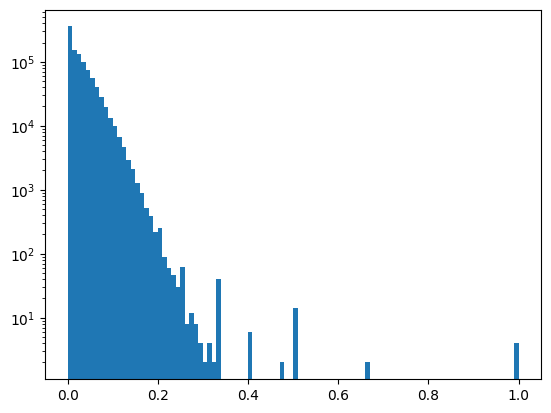

In [13]:
plt.hist(edge_weights.flatten(), bins=100, log=True)

(array([3.56016e+05, 1.51162e+05, 1.29956e+05, 9.98920e+04, 7.53600e+04,
        5.66960e+04, 3.98920e+04, 2.77720e+04, 1.98600e+04, 1.32340e+04,
        9.95000e+03, 6.62400e+03, 4.64400e+03, 2.92600e+03, 2.07600e+03,
        1.29000e+03, 8.82000e+02, 5.14000e+02, 3.88000e+02, 2.18000e+02,
        2.52000e+02, 9.00000e+01, 6.00000e+01, 4.60000e+01, 3.00000e+01,
        6.20000e+01, 8.00000e+00, 1.20000e+01, 8.00000e+00, 4.00000e+00,
        2.00000e+00, 4.00000e+00, 2.00000e+00, 4.00000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        1.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00

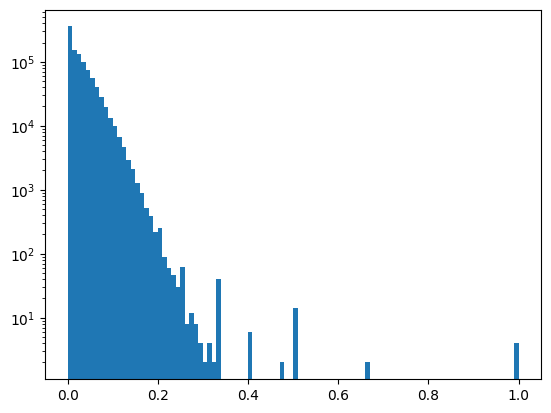

In [14]:
# hist of edge_weights
plt.hist(edge_weights.flatten(), bins=100, log=True)

In [16]:
# Create an empty graph
graph = nx.Graph()

# Add edges to the graph based on the edge_weights array
for i in range(len(selected_users)):
    for j in range(i+1, len(selected_users)):
        if edge_weights[i, j] > 0:
            graph.add_edge(selected_users[i], selected_users[j], weight=edge_weights[i, j])



In [17]:
# save graph
nx.write_gexf(graph, '../graph/iou_graph.gexf')


In [20]:
graph = nx.read_gexf('../graph/iou_gaph.gexf')